## Data Storytelling


### Introduction:

This notebook demonstarte some insights from the trips data of Divvy which is a bicycle sharing system in the City of Chicago.
https://www.divvybikes.com/

## Data:

Data sets of trip and stations details are downladable from https://www.divvybikes.com/data


This notebook is targeting Q1 & Q2 2017 trips data as well as stations data:


Metadata for Trips:  

Variables:  

trip_id: ID attached to each trip taken  
start_time: day and time trip started, in CST  
stop_time: day and time trip ended, in CST  
bikeid: ID attached to each bike  
tripduration: time of trip in seconds   
from_station_name: name of station where trip originated  
to_station_name: name of station where trip terminated   
from_station_id: ID of station where trip originated  
to_station_id: ID of station where trip terminated  
usertype: "Customer" is a rider who purchased a 24-Hour Pass; "Subscriber" is a rider who purchased an Annual Membership  
gender: gender of rider   
birthyear: birth year of rider  

Divvy_Trips_2017_Q1 has 431,691 rows  
Divvy_Trips_2017_Q2 has 1,119,814 rows  



Metadata for Stations:  

Variables:  

id: ID attached to each station  
name: station name      
latitude: station latitude  
longitude: station longitude  
dpcapacity: number of total docks at each station as of 6/30/2017  
online_date: date the station was created in the system  

Divvy_Stations_2017_Q1Q2 has 582 rows  


In [1]:
%matplotlib inline

import datetime as dt
import calendar
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from datetime import datetime
from mpl_toolkits.basemap import Basemap

#### Load stations data:

In [2]:
divvy_stations = pd.read_csv('Divvy_Stations_2017_Q1Q2.csv')
divvy_stations.head()

,id,name,city,latitude,longitude,dpcapacity,online_date
0,456,2112 W Peterson Ave,Chicago,41.991178,-87.683593,15,2/10/2015 14:04:42
1,101,63rd St Beach,Chicago,41.781016,-87.576120,23,7/16/2013 01:27:50
2,109,900 W Harrison St,Chicago,41.874675,-87.650019,19,7/18/2013 16:45:02
3,21,Aberdeen St & Jackson Blvd,Chicago,41.877726,-87.654787,15,6/22/2013 19:07:12
4,80,Aberdeen St & Madison (Monroe) St,Chicago,41.881567,-87.655056,19,6/26/2013 19:00:18


#### Load and combine trips data sets:

In [3]:
divvy_q1 = pd.read_csv('Divvy_Trips_2017_Q1.csv')
divvy_q2 = pd.read_csv('Divvy_Trips_2017_Q2.csv')

divvy_rides = pd.concat([divvy_q1, divvy_q2]).reset_index(drop=True)
divvy_rides.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,13518905,3/31/2017 23:59:07,4/1/2017 00:13:24,5292,857,66,Clinton St & Lake St,171,May St & Cullerton St,Subscriber,Male,1989.0
1,13518904,3/31/2017 23:56:25,4/1/2017 00:00:21,4408,236,199,Wabash Ave & Grand Ave,26,McClurg Ct & Illinois St,Subscriber,Male,1990.0
2,13518903,3/31/2017 23:55:33,4/1/2017 00:01:21,696,348,520,Greenview Ave & Jarvis Ave,432,Clark St & Lunt Ave,Subscriber,Female,1979.0
3,13518902,3/31/2017 23:54:46,3/31/2017 23:59:34,4915,288,110,Dearborn St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1985.0
4,13518901,3/31/2017 23:53:33,4/1/2017 00:00:28,4247,415,327,Sheffield Ave & Webster Ave,331,Halsted St & Blackhawk St (*),Subscriber,Female,1989.0


#### Add columns to support data analysis:

In [4]:
# create a date column
divvy_rides['start_date'] = divvy_rides['start_time'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M:%S').date())

# create a week day
divvy_rides['week_day'] = divvy_rides['start_time'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M:%S').weekday())

# create a day name
divvy_rides['day_name'] = divvy_rides['week_day'].apply(lambda x: calendar.day_name[x])

# create hour column
divvy_rides['start_hour'] = divvy_rides['start_time'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M:%S').hour)

# create a flag column for AM rush hours: 7:00-9:00 AM
divvy_rides['am_rush'] = divvy_rides['start_hour'].apply(lambda x: True if x in [7,8,9] else False)

# create a flag column for PM rush hours: 4:00-6:00 PM
divvy_rides['pm_rush'] = divvy_rides['start_hour'].apply(lambda x: True if x in [16,17,18] else False)

divvy_rides.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,start_date,week_day,day_name,start_hour,am_rush,pm_rush
0,13518905,3/31/2017 23:59:07,4/1/2017 00:13:24,5292,857,66,Clinton St & Lake St,171,May St & Cullerton St,Subscriber,Male,1989.0,2017-03-31,4,Friday,23,False,False
1,13518904,3/31/2017 23:56:25,4/1/2017 00:00:21,4408,236,199,Wabash Ave & Grand Ave,26,McClurg Ct & Illinois St,Subscriber,Male,1990.0,2017-03-31,4,Friday,23,False,False
2,13518903,3/31/2017 23:55:33,4/1/2017 00:01:21,696,348,520,Greenview Ave & Jarvis Ave,432,Clark St & Lunt Ave,Subscriber,Female,1979.0,2017-03-31,4,Friday,23,False,False
3,13518902,3/31/2017 23:54:46,3/31/2017 23:59:34,4915,288,110,Dearborn St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1985.0,2017-03-31,4,Friday,23,False,False
4,13518901,3/31/2017 23:53:33,4/1/2017 00:00:28,4247,415,327,Sheffield Ave & Webster Ave,331,Halsted St & Blackhawk St (*),Subscriber,Female,1989.0,2017-03-31,4,Friday,23,False,False


#### What is the trend of daily trips counts during Jan - Jun 2017?

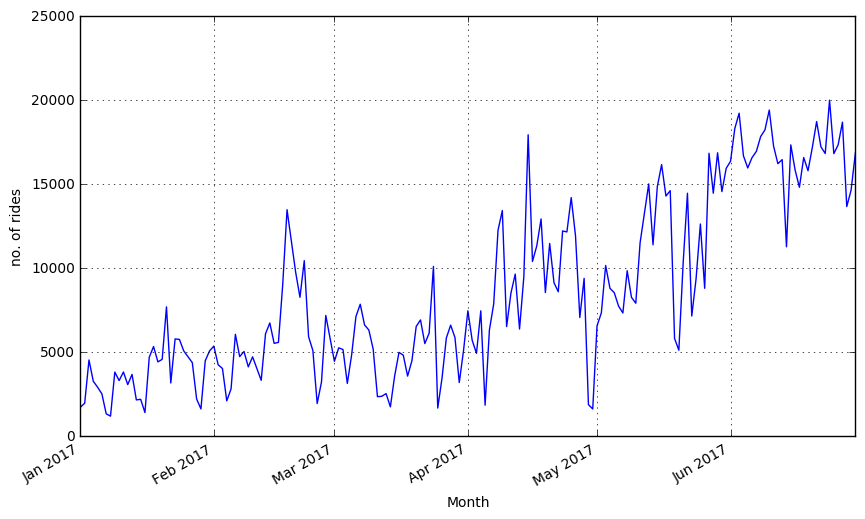

In [5]:
fig, ax = plt.subplots(1, 1, figsize = (10, 6))
fig.autofmt_xdate()
ax.set_xlim([dt.date(2017, 1, 1), dt.date(2017, 6, 30)])
ax.plot(divvy_rides.groupby('start_date').size())
ax.grid()
ax.set_xlabel('Month')
ax.set_ylabel('no. of rides')



From the above time series plot, it is clear that there is a general increase in rides towards June. This may be explained by better weather conditions towards the summer. There are also some clear dips in the trend. Are these dips associated with specific days of the week?  


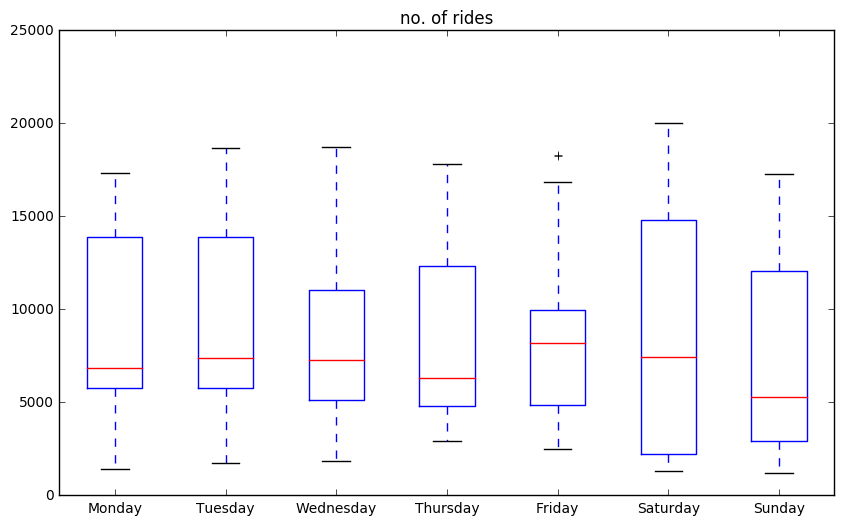

In [6]:
day_names = [calendar.day_name[x] for x in range(7)]

dso = divvy_rides.groupby(['week_day', 'start_date']).size().to_frame()
dso.columns = ['count_per_day']
dso.reset_index(inplace=True)

days = []

for i in range(7):
    days.append(dso[(dso.week_day == i)].count_per_day)

fig, ax = plt.subplots(1, 1, figsize = (10, 6))
ax.boxplot(days, labels=day_names)
ax.set_title("no. of rides")


From the above boxplot, most variability  in rides trend is associated with Saturday. Let us verify that by comparing individual week day's patterns:

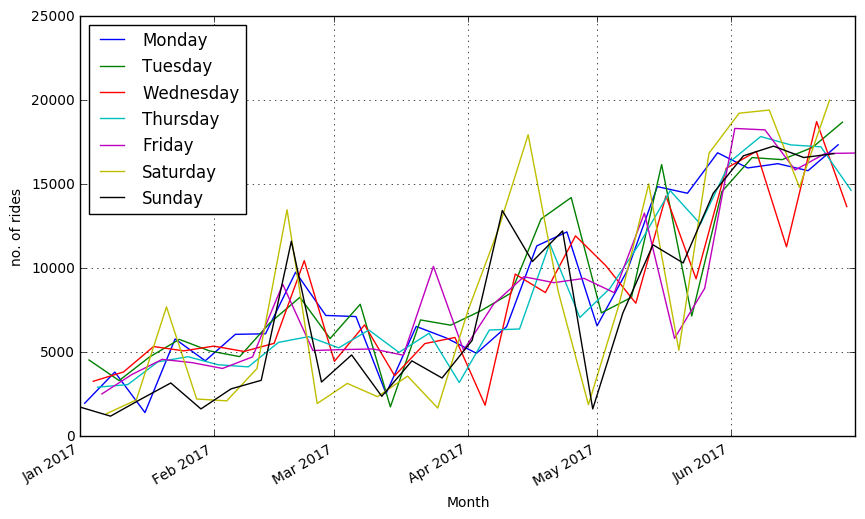

In [7]:

dso = divvy_rides.groupby(['week_day', 'start_date']).size().to_frame()
dso.columns = ['count_per_day']
dso.reset_index(inplace=True)

fig, ax = plt.subplots(1, 1, figsize = (10, 6))
fig.autofmt_xdate()
ax.set_xlim([dt.date(2017, 1, 1), dt.date(2017, 6, 30)])
for i in range(7):
    ds = dso[(dso.week_day == i)].groupby('start_date').sum()
    ds.drop(["week_day"], axis=1, inplace='True')
    ax.plot(ds, label=calendar.day_name[i])
    
ax.grid()
ax.set_xlabel('Month')
ax.set_ylabel('no. of rides')
ax.legend(loc=2)

Now, it seems clear that Saturday trips pattern is the major cause for dips and spikes in the overall trips pattern.

#### How trips are distributed across the day?

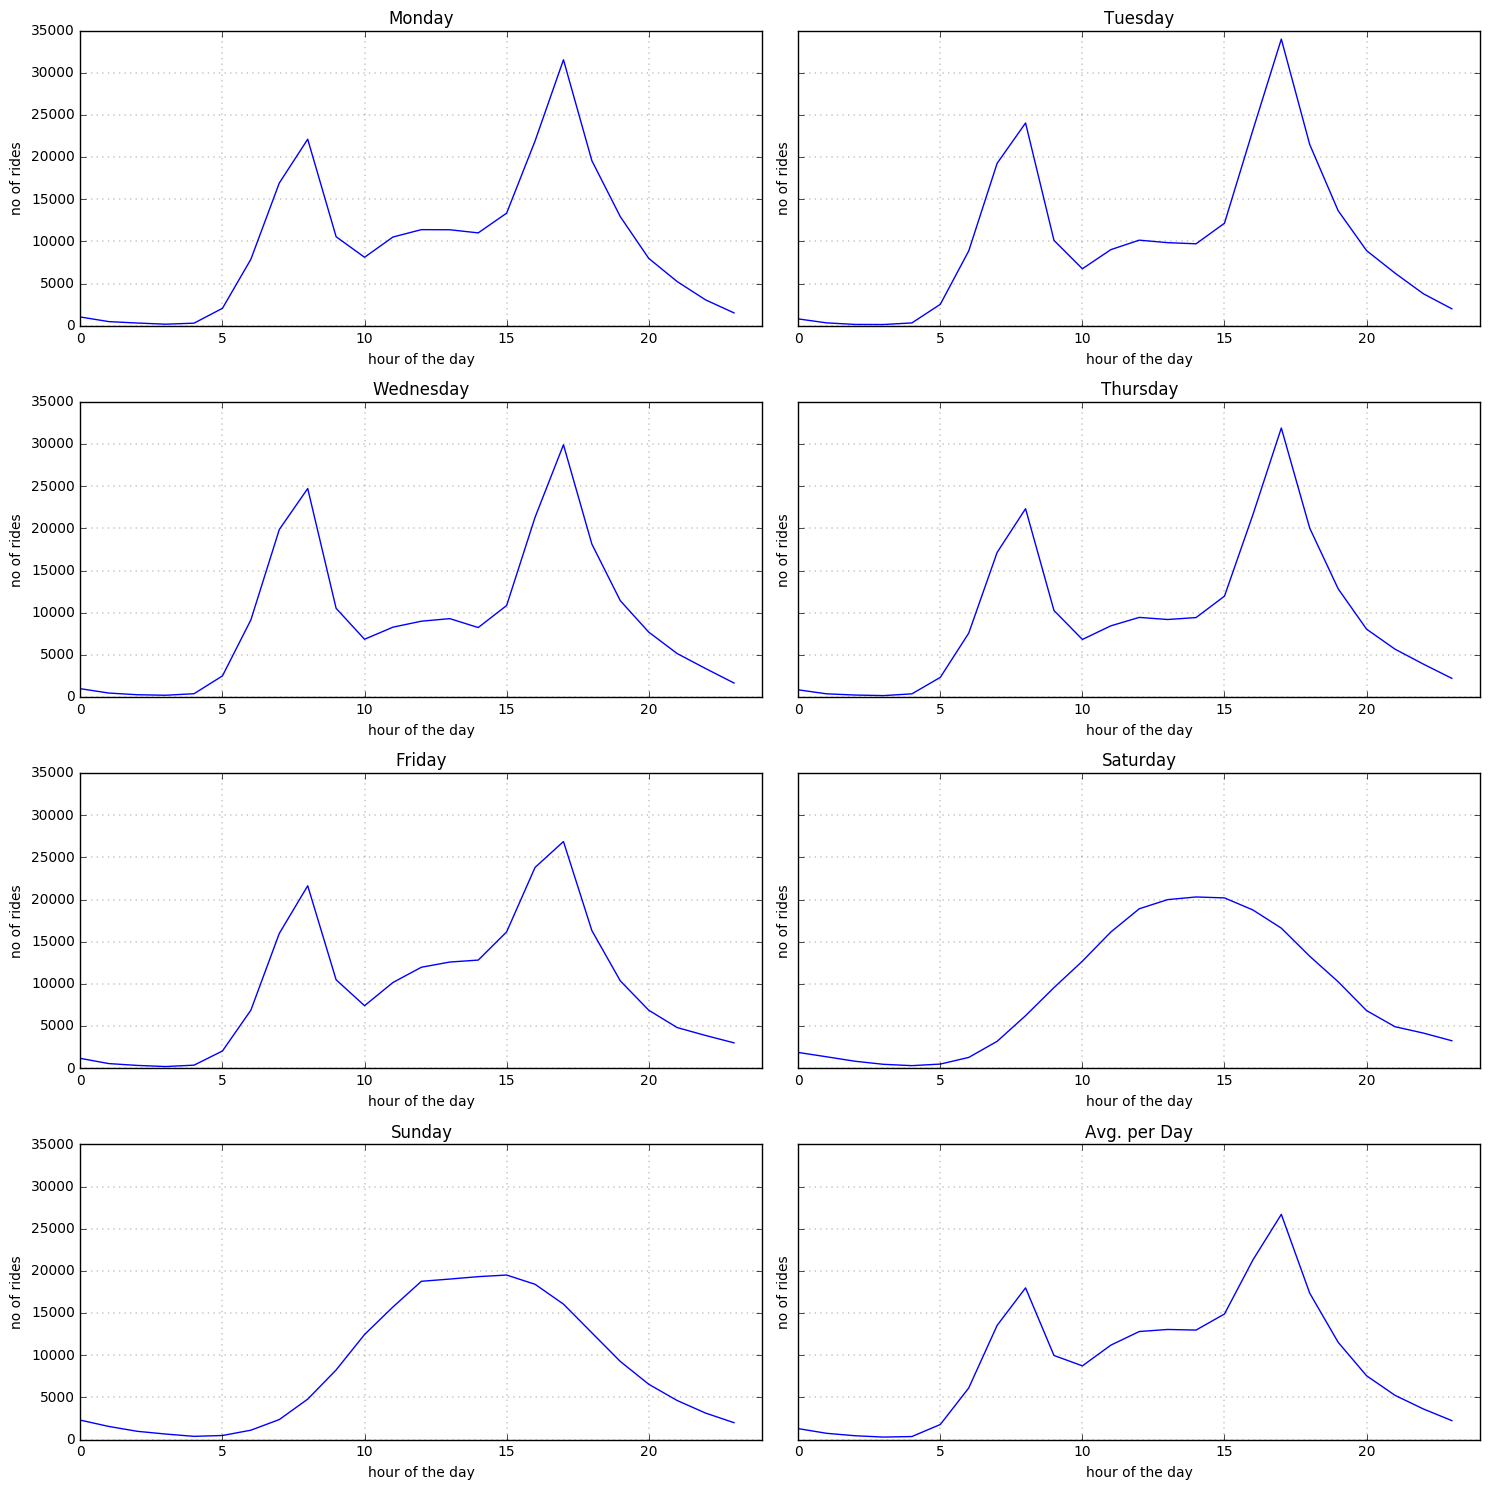

In [8]:

fig, axes = plt.subplots(4, 2,  figsize = (15, 15), sharey=True)

#plot each week day
for i, ax in enumerate(axes.flatten()):
    if i < 7:
        ds = divvy_rides[(divvy_rides.week_day == i)].groupby('start_hour').size()
        ax.plot(ds)
        ax.set_title(calendar.day_name[i])
        ax.grid(linewidth=0.25)
        ax.set_xlim((0, 24))
        ax.set_xlabel('hour of the day')
        ax.set_ylabel('no of rides')
    else:
        #plot average per day
        dso = divvy_rides.groupby(['start_hour', 'week_day']).size().to_frame()
        dso.columns = ['count_per_day']
        dso.reset_index(inplace=True)
        dso = dso.groupby('start_hour')['count_per_day'].mean()
        ax.plot(dso)
        ax.set_title('Avg. per Day')
        ax.grid(linewidth=0.25)
        ax.set_xlim((0, 24))
        ax.set_xlabel('hour of the day')
        ax.set_ylabel('no of rides')


fig.tight_layout()



The above plot of trips count per hour for each day shows different patterns for weekdays and weekends. Monday to Friday shows similar pattern with two peaks for trip counts during AM and PM rush hours, while for Saturday and Sunday shows one peak at around 12:00 to 3:00 PM.

#### How rides are distributed across hours for workdays?

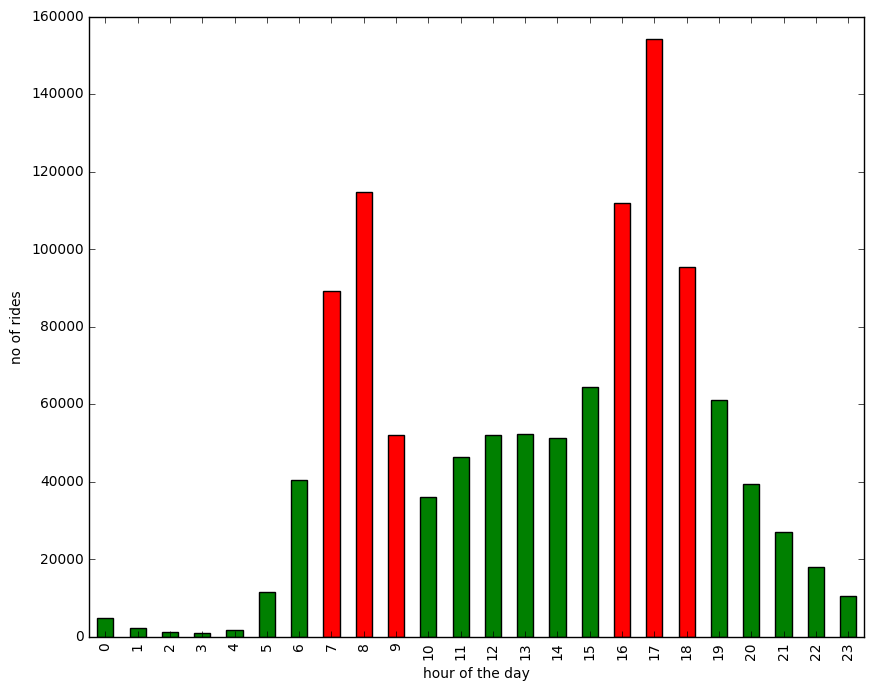

In [9]:

group_weekdays = divvy_rides[(divvy_rides.week_day != 5) & (divvy_rides.week_day != 6)].groupby('start_hour').size()

color_list = ['g']*7 + ['r']*3 + ['g']*6 + ['r']*3 + ['g']*5

fig, ax = plt.subplots(1, 1, figsize = (10, 8))

ax= group_weekdays.plot(kind='bar', color=color_list)
ax.set_xlabel('hour of the day')
ax.set_ylabel('no of rides')

The above histogram shows two peaks in rides for AM and PM rush hours.

#### How are rides count and ride duration related ?

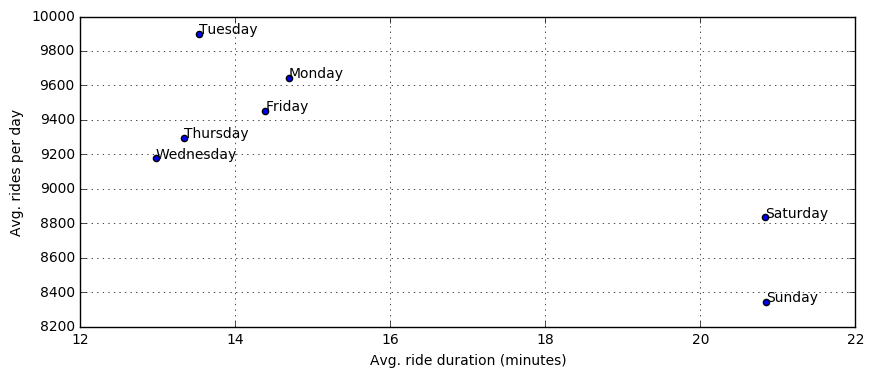

In [10]:

df_wkd_tripcount = divvy_rides.groupby(['week_day', 'start_hour']).size().to_frame()
df_wkd_tripcount.columns = ['counts']
df_wkd_tripcount.reset_index(inplace=True)
df_wkd_tripcount = df_wkd_tripcount.groupby('week_day')['counts'].mean()

df_wkd_tripdurm = divvy_rides.groupby(['week_day'])['tripduration'].mean()/60
df_wkd_tripdurm.columns = ['avg_ride_duration']

df_wkd_summary = pd.concat([df_wkd_tripcount, df_wkd_tripdurm], axis=1)
df_wkd_summary.columns = ['avg_rides_per_day', 'avg_ride_duration']

day_names = [calendar.day_name[x] for x in range(7)]

fig, ax = plt.subplots(1, 1,  figsize = (10, 4))

ax.scatter(df_wkd_summary.avg_ride_duration, df_wkd_summary.avg_rides_per_day)
ax.set_xlabel('Avg. ride duration (minutes)')
ax.set_ylabel('Avg. rides per day')
ax.grid()

for i, txt in enumerate(day_names):
    ax.annotate(txt, (df_wkd_summary.avg_ride_duration[i],df_wkd_summary.avg_rides_per_day[i]))

The scatter plot above shows that the bike usage is higher during the weekdays with average ride duration of 14 minutes, but people ride for longer averagre duration of 21 minutes during the weekends.

#### Which districts in Chicago have the biggest rides share? Is there any difference between weekdays and weekends?

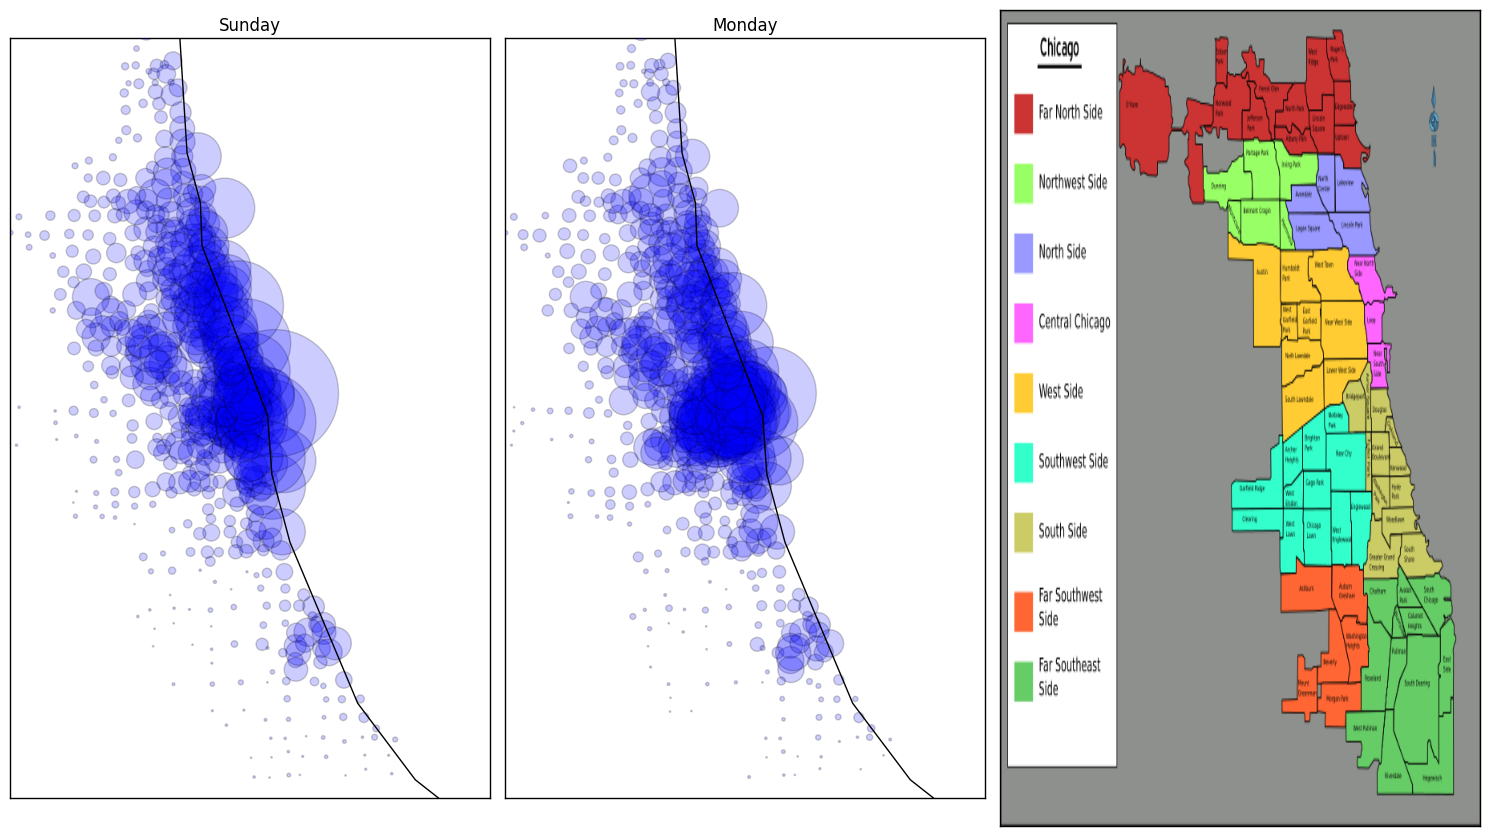

In [11]:
    
fig, axes = plt.subplots(1, 3,  figsize = (15, 20))

i = 6 # Sunday

axes[0].set_title(calendar.day_name[i])


m  = Basemap(llcrnrlon=-87.75,llcrnrlat=41.735,urcrnrlon=-87.5,urcrnrlat=42.03,projection='merc',resolution='h', ax=axes[0])
m.drawcoastlines(zorder = 0)
m.drawmapboundary(zorder = 0)
m.drawcoastlines()
ds = divvy_rides[(divvy_rides.week_day == i)].groupby('from_station_id').size().to_frame()
ds.reset_index(inplace=True)
ds.columns = ['id','trip_count']
ds_geo = pd.merge(divvy_stations, ds, on='id', how='inner')

lats = list(ds_geo['latitude'])
lons = list(ds_geo['longitude'])
values = list(ds_geo['trip_count'])

x, y = m(lons, lats)
m.scatter(x, y, s=values, alpha = 0.2, zorder = 1)


i = 0 # Monday

axes[1].set_title(calendar.day_name[i])


m  = Basemap(llcrnrlon=-87.75,llcrnrlat=41.735,urcrnrlon=-87.5,urcrnrlat=42.03,projection='merc',resolution='h', ax=axes[1])
m.drawcoastlines(zorder = 0)
m.drawmapboundary(zorder = 0)
m.drawcoastlines()
ds = divvy_rides[(divvy_rides.week_day == i)].groupby('from_station_id').size().to_frame()
ds.reset_index(inplace=True)
ds.columns = ['id','trip_count']
ds_geo = pd.merge(divvy_stations, ds, on='id', how='inner')

lats = list(ds_geo['latitude'])
lons = list(ds_geo['longitude'])
values = list(ds_geo['trip_count'])

x, y = m(lons, lats)
m.scatter(x, y, s=values, alpha = 0.2, zorder = 1)



img = mpimg.imread('Chicago_neighborhoods_outline.png') 
axes[2].imshow(img, extent=[0,100,0,1], aspect=170)
axes[2].set_xticks([])
axes[2].set_yticks([])

fig.tight_layout()

plt.show()
    

The above figure compares the rides distribution on Chicago map for a typical weekday and weekend days. The size of the circles is proportional to the rides count for each station. There are some clear differences between the two maps, for example on Mondays there is a high trips concentration in the West Side and South West Side, whereas on Sundays the large circle sizes in Central Chicago and North Side indicates higher bike usage in that part of the city.

### Conclusion:

From raw data of Divvy bikes rides for the period Jan to Jun 2017, the following insights were discovered:  

*  There is increasing trend in rides (number of trips) from Jan towards June, with some dips and spikes, mainly due to fluctuation of Saturday rides pattern.  

*  Weekdays have different rides patterns from weekends. Monday to Friday has two spikes during AM and PM rush hours, while Saturday and Sunday have steady increase in rides from morning up to 3:00 PM and then steady decline.  

*  Bikes usage is more during weekdays with average trip duration of 14 minutes. During the weekend the usage is less but people seem to ride for longer durations (average 21 minutes).  

*  Trips concentration is high in the West Side and South West Side in a typical workday, whereas on weekends, Central Chicago and North Side shows higher bike usage in that part of the city.  

